In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData

In [3]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

### First method (for small cities)

In [4]:
# change the city name and run

params = MaaSSim.utils.get_config('glance.json') 
params.city = 'Sora, Italy'
MaaSSim.utils.make_config_paths(params, main=None, rel = False)
inData = MaaSSim.utils.download_G(inData, params)
MaaSSim.utils.save_G(inData, params)
print("Graph is saved to '...MaaSSim/data/graphs'")

MemoryError: 

### Second method (for small cities)

In [4]:
city='karjat, India'
dist_threshold=100000

# uses osmnx to download the graph
print('Downloading network for {} with osmnx'.format(city))
G = ox.graph_from_place(city, network_type='drive')
# inData.nodes = pd.DataFrame.from_dict(dict(inData.G.nodes(data=True)), orient='index')
skim_generator = nx.all_pairs_dijkstra_path_length(G, weight='length')
skim_dict = dict(skim_generator)
skim = pd.DataFrame(skim_dict).fillna(dist_threshold).T.astype(int)
ox.save_graphml(G, filepath="../../data/graphs/{}.graphml".format(city.split(",")[0]))
skim.to_csv("../../data/graphs/{}.csv".format(city.split(",")[0]), chunksize=20000000)
print("Graph is saved to '...MaaSSim/data/graphs'")

Graph is saved to '...MaaSSim/data/graphs'


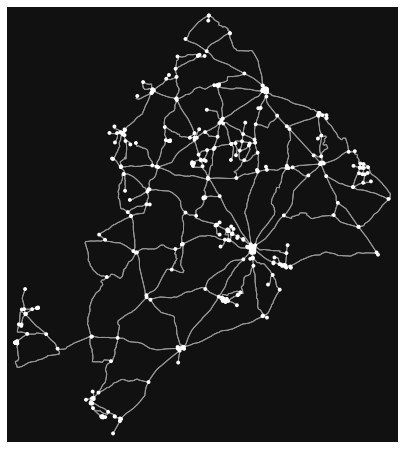

In [6]:
fig, ax = ox.plot_graph(G)

### Third method (for large cities)

In [ ]:
# For big cities use the code below

city = 'Bangalore, India'
dist_threshold = 100000

G = ox.graph_from_place(city, network_type='drive')
skim = pd.DataFrame()

# Function to update DataFrame in batches
def update_skim_dataframe(G, dist_threshold, batch_size=1000):
    nodes = list(G.nodes)
    
    for i in range(0, len(nodes), batch_size):
        sub_nodes = nodes[i:i + batch_size]
        sub_graph = G.subgraph(sub_nodes)
        skim_generator = nx.all_pairs_dijkstra_path_length(sub_graph, weight='length')

        # Convert generator to DataFrame batch
        batch_skim = pd.DataFrame(dict(skim_generator))

        # Update main skim DataFrame
        global skim
        skim = pd.concat([skim, batch_skim], axis=1)

    skim.fillna(dist_threshold, inplace=True)
    skim = skim.T.astype(int)

update_skim_dataframe(G, dist_threshold)

ox.save_graphml(G, filepath="../../data/graphs/{}.graphml".format(city.split(",")[0]))
skim.to_csv("../../data/graphs/{}.csv".format(city.split(",")[0]), chunksize=20000000) 
print("Graph is saved to '...MaaSSim/data/graphs'")
